In [1]:
import os
import sys

sys.path.append("..")  # Avoid error with importing of src
from src.utils_py.auxil import *
import numpy as np
import matplotlib.pyplot as plt

---

# Проверка формул на предельных случаях

In [2]:
S_theta = [S_droplet_theta, S_doughnut_theta, S_worm_theta, S_roll_theta, S_perforation_theta, S_layer_theta]
min_theta = [phi_min_droplet_theta, phi_min_doughnut_theta, phi_min_worm_theta, phi_min_roll_theta, phi_min_perforation_theta, phi_min_layer_theta]
max_theta = [phi_max_droplet_theta, phi_max_doughnut_theta, phi_max_worm_theta, phi_max_roll_theta, phi_max_perforation_theta, phi_max_layer_theta]

S_delta = [S_droplet_delta, S_doughnut_delta, S_worm_delta, S_roll_delta, S_perforation_delta, S_layer_delta]
min_delta = [phi_min_droplet_delta, phi_min_doughnut_delta, phi_min_worm_delta, phi_min_roll_delta, phi_min_perforation_delta, phi_min_layer_delta]
max_delta = [phi_max_droplet_delta, phi_max_doughnut_delta, phi_max_worm_delta, phi_max_roll_delta, phi_max_perforation_delta, phi_max_layer_delta]

S_180 = [S_droplet_180, S_doughnut_180, S_worm_180, S_roll_180, S_perforation_180, S_layer_180]
min_180 = [phi_min_droplet_180, phi_min_doughnut_180, phi_min_worm_180, phi_min_roll_180, phi_min_perforation_180, phi_min_layer_180]
max_180 = [phi_max_droplet_180, phi_max_doughnut_180, phi_max_worm_180, phi_max_roll_180, phi_max_perforation_180, phi_max_layer_180]

In [3]:
f = open('output_delta.txt', 'w')

for type_id in range(len(S_delta)):
    # type_id = '_'.join(type.split('_')[:2])
    print(S_delta[type_id].__name__, file=f)
    print('{:>5}{:>5} |{:>15}{:>15}{:>15}{:>10}{:>10} |{:>10}{:>10}{:>10}{:>10}{:>10} |{:>10}{:>10}{:>10}{:>10}{:>10}'.format('phi', 'l', 'S_delta', 'S_theta', 'S_180', 'err_S_dt', 'err_S_dpi', 'min_delta', 'min_theta', 'min_180', 'err_min_dt', 'err_min_dpi', 'max_delta', 'max_theta', 'max_180', 'err_max_dt', 'err_min_dpi'), file=f)
    print('–'*183, file=f)
    # print('{:>5}{:>5}{:>15}{:>15}'.format('l', 'phi', 'S_general', 'S_180'))
    for phi in np.arange(0, 1.1, 0.2):
        for l in np.arange(0.1, 5, 0.5):
                S_d = S_delta[type_id](l, phi, 0)
                phi_min_delta = min_delta[type_id](l, 0)
                phi_max_delta = max_delta[type_id](l, 0)

                S_t = S_theta[type_id](l, phi, np.pi)
                phi_min_theta = min_theta[type_id](l, np.pi)
                phi_max_theta = max_theta[type_id](l, np.pi)

                S_pi = S_180[type_id](l, phi)
                phi_min_180 = min_180[type_id](l)
                phi_max_180 = max_180[type_id](l)
                # print('{:>5.1f}{:>5.1f}{:>15.5f}{:>15.5f}{:>15.5f}{:>15.5f}{:>15.5f}{:>15.5f}'.format(l, phi, gen, part, gen[1][0], part[1][0], gen[1][1], part[1][1]))
                print('{:>5.1f}{:>5.1f} |{:>15.5f}{:>15.5f}{:>15.5f}{:>10.3f}{:>10.3f} |{:>10.3f}{:>10.3f}{:>10.3f}{:>10.3f}{:>10.3f} |{:>10.3f}{:>10.3f}{:>10.3f}{:>10.3f}{:>10.3f}'.format(
                    phi, l,
                    S_d, S_t, S_pi, abs(S_d - S_t), abs(S_d - S_pi),
                    phi_min_delta, phi_min_theta, phi_min_180, abs(phi_min_delta - phi_min_theta), abs(phi_min_delta - phi_min_180),
                    phi_max_delta, phi_max_theta, phi_max_180, abs(phi_max_delta - phi_max_theta), abs(phi_max_delta - phi_max_180)),
                file=f)
                # print('{:>5.1f}{:>5.1f}{:>15.5f}{:>15.5f}'.format(l, phi, gen, part))
    print(file=f)

f.close()

---

# Проверка профилей плотности

0.5997568632845283


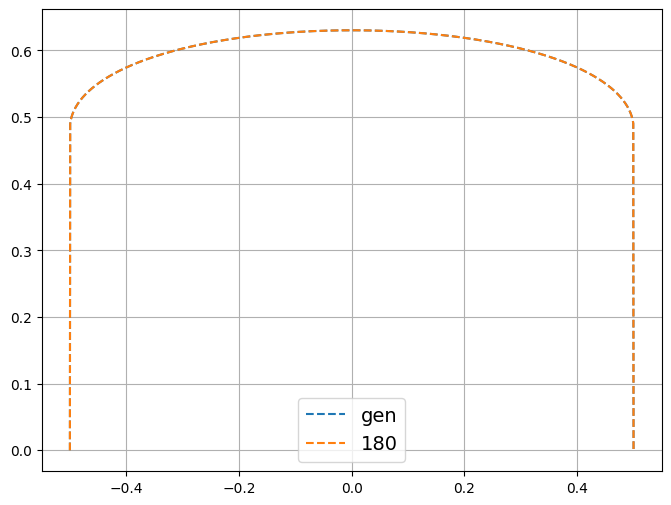

In [4]:
l = 8
phi = 0.6
z = np.linspace(-0.5, 0.5, 2000, endpoint=True)

rho_gen = rho_perforation(z, l, phi, np.deg2rad(180))
rho_180 = rho_perforation_180(z, l, phi)

plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(z, rho_gen, '--', label='gen')
plt.plot(z, rho_180, '--', label='180')
plt.legend(fontsize=14)

print(np.trapz(rho_gen, z))
# print('S_gen:', np.trapz(rho_gen, z))
# print('S_180:', np.trapz(rho_180, z))
# print('Err:  ', np.trapz(np.abs(rho_gen - rho_180, z)))

---

# Вид профиля плотности при различных углах

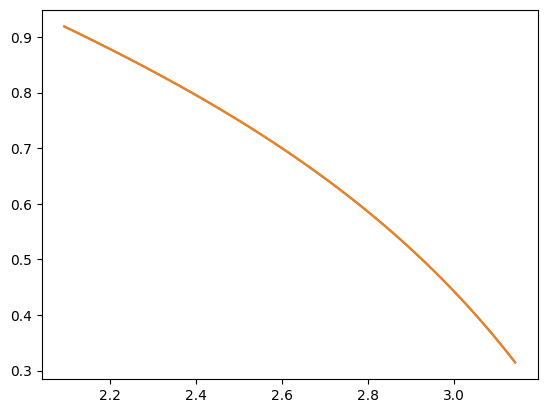

In [2]:
th = np.linspace(2 * np.pi / 3, np.pi, 100)

plt.plot(th, d_roll_theta(2.2, 0.5, th))
plt.plot(th, d_roll_alpha(2.2, 0.5, th, 0))

In [18]:
# d_roll_alpha(2.2, 0.5, np.pi, 0.02)

phi=0.5
l = 2.2
th = np.pi
delta=0.1

In [19]:
phi * l - (1 - 2 * delta) * np.tan(th)

1.1

In [20]:
0.5 * (1 - 2 * delta) * np.sqrt(1 - np.cos(th) ** 2 / (1 - 2 * delta) ** 2) / np.cos(th)

/var/folders/jx/xrzz7g5x5g582hdxfxg7fb680000gn/T/ipykernel_60017/3020531329.py:1: RuntimeWarning: invalid value encountered in sqrt
  0.5 * (1 - 2 * delta) * np.sqrt(1 - np.cos(th) ** 2 / (1 - 2 * delta) ** 2) / np.cos(th)


nan

In [17]:
0.5 * (1 - 2 * delta) ** 2 * np.arcsin(np.cos(th) / (1 - 2 * delta)) / np.cos(th) ** 2

-0.7853981633974483

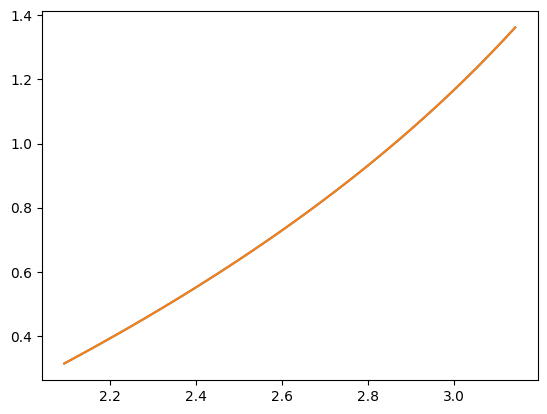

In [5]:
delta = np.linspace(0, 0.2, 100)

plt.plot(th, d_roll_delta(2.2, 0.5, delta))
plt.plot(th, d_roll_alpha(2.2, 0.5, np.pi, delta))

S_delta:  0.50050
S_delta:  0.50049
S_delta:  0.50048
S_delta:  0.50047
S_delta:  0.50046
S_delta:  0.50045
S_delta:  0.50043
S_delta:  0.50042
S_delta:  0.50040
S_delta:  0.50038


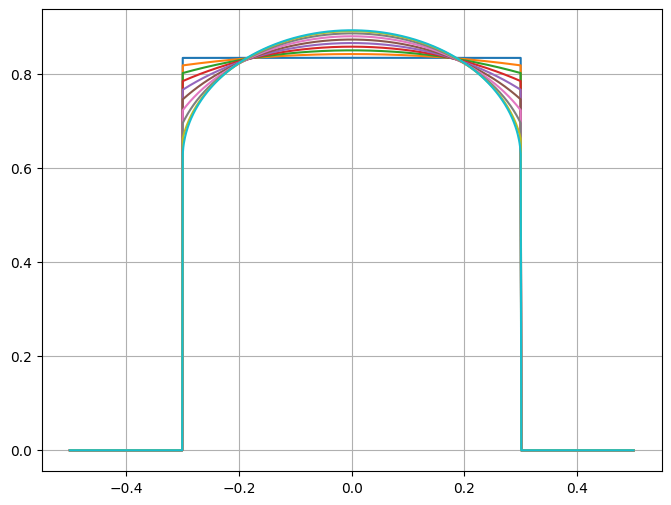

In [11]:
l = 2.2
phi = 0.5
z = np.linspace(-0.5, 0.5, 1000, endpoint=True)

theta = np.linspace(np.deg2rad(90.1), np.pi, 10)
# delta = np.linspace(0, 0.2, 4, endpoint=True)

plt.figure(figsize=(8, 6))
plt.grid()

d = 0.2
for th in theta:
# for d in delta:
    rho = rho_roll_alpha(z, l, phi, th, d)
    # plt.plot(z, rho, label='{:.1f}'.format(np.rad2deg(th)))
    # print('S_{:.1f}:  {:.5f}'.format(np.rad2deg(th), np.trapz(rho, z)))
    plt.plot(z, rho, label='{:.1f}'.format(d))
    print('S_{}:  {:.5f}'.format('delta', np.trapz(rho, z)))
# plt.legend(fontsize=14)
plt.show()

# Вид профиля плотности при различных delta

In [ ]:
l = 2
phi = 0.1
z = np.linspace(-0.5, 0.5, 1000, endpoint=True)

# theta = np.linspace(np.deg2rad(90.1), pi, 10)
delta = np.linspace(0, 0.25, 5, endpoint=True)

plt.figure(figsize=(8, 6))
plt.grid()

# for th in theta:
for d in delta:
    rho = rho_roll_delta(z, l, phi, d)
    # plt.plot(z, rho, label='{:.1f}'.format(np.rad2deg(th)))
    # print('S_{:.1f}:  {:.5f}'.format(np.rad2deg(th), np.trapz(rho, z)))
    plt.plot(z, rho, label='{:.1f}'.format(d))
    print('S_{}:  {:.5f}'.format('delta', np.trapz(rho, z)))
plt.legend(fontsize=14)
plt.show()

---

# Проверка ВСЕХ формул 

In [1]:
import os
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate, SEPARATING_LINE

import sys
sys.path.append("..")  # Avoid error with importing of src
from src.utils_py import interface

In [2]:
shapes = ['droplet', 'doughnut', 'worm', 'roll', 'perforation', 'layer']

### Проверка $d$ и $r$ для delta и alpha при $\theta = \pi$

In [13]:
L = [1, 2, 3, 4]
PHI = np.arange(0.05, 1, 0.4)

theta = np.pi
DELTA = np.linspace(0, 0.5, 10, endpoint=False)

result = []


for shape in shapes:
    if shape == 'layer':
        continue

    for l in L:
        for phi in PHI:
            for delta in DELTA:
                type = "d" if shape in ['doughnut', 'roll', 'perforation'] else "r"
                d_r_delta = getattr(interface, f"{type}_{shape}_delta")
                d_r_alpha = getattr(interface, f"{type}_{shape}_alpha")

                result.append([
                    shape,
                    l,
                    phi,
                    np.rad2deg(theta),
                    delta,
                    d_r_delta(l, phi, delta),
                    d_r_alpha(l, phi, theta, delta),
                    np.abs(d_r_delta(l, phi, delta) - d_r_alpha(l, phi, theta, delta)) * 100
                ])
    result.append(SEPARATING_LINE)

In [14]:
print(
    tabulate(
        result,
        headers=["Shape", "l", "phi", "theta, º", "delta", "d_r_delta", "d_r_alpha", "error"],
        tablefmt="github",
        floatfmt=".2f",
    )
)

| Shape       |   l |   phi |   theta, º |   delta |   d_r_delta |   d_r_alpha |   error |
|-------------|-----|-------|------------|---------|-------------|-------------|---------|
| droplet     |   1 |  0.05 |     180.00 |    0.00 |        0.23 |        0.23 |    0.00 |
| droplet     |   1 |  0.05 |     180.00 |    0.05 |        0.23 |        0.23 |    0.00 |
| droplet     |   1 |  0.05 |     180.00 |    0.10 |        0.23 |        0.23 |    0.00 |
| droplet     |   1 |  0.05 |     180.00 |    0.15 |        0.23 |        0.23 |    0.00 |
| droplet     |   1 |  0.05 |     180.00 |    0.20 |        0.23 |        0.23 |    0.00 |
| droplet     |   1 |  0.05 |     180.00 |    0.25 |        0.23 |        0.23 |    0.00 |
| droplet     |   1 |  0.05 |     180.00 |    0.30 |        0.23 |        0.23 |    0.00 |
| droplet     |   1 |  0.05 |     180.00 |    0.35 |        0.23 |        0.23 |    0.00 |
| droplet     |   1 |  0.05 |     180.00 |    0.40 |        0.23 |        0.23 |    0.00 |

### Проверка $d$ и $r$ для theta и alpha при $\delta = 0$

In [11]:
L = [1, 2, 3, 4]
PHI = np.arange(0.05, 1, 0.4)

THETA = np.deg2rad(np.arange(95, 180, 15))
delta = 0

result = []


for shape in shapes:
    if shape == 'layer':
        continue

    for l in L:
        for phi in PHI:
            for theta in THETA:
                type = "d" if shape in ['doughnut', 'roll', 'perforation'] else "r"
                d_r_theta = getattr(interface, f"{type}_{shape}_theta")
                d_r_alpha = getattr(interface, f"{type}_{shape}_alpha")

                result.append([
                    shape,
                    l,
                    phi,
                    theta,
                    delta,
                    d_r_theta(l, phi, theta),
                    d_r_alpha(l, phi, theta, delta),
                    np.abs(d_r_theta(l, phi, theta) - d_r_alpha(l, phi, theta, delta)) * 100
                ])
    result.append(SEPARATING_LINE)

In [12]:
print(
    tabulate(
        result,
        headers=["Shape", "l", "phi",  "theta, º", "delta", "d_r_theta", "d_r_alpha", "error"],
        tablefmt="github",
        floatfmt=".3f",
    )
)

| Shape       |   l |   phi |   theta, º |   delta |   d_r_theta |   d_r_alpha |   error |
|-------------|-----|-------|------------|---------|-------------|-------------|---------|
| droplet     |   1 | 0.050 |      1.658 |       0 |       0.276 |       0.276 |   0.000 |
| droplet     |   1 | 0.050 |      1.920 |       0 |       0.252 |       0.252 |   0.000 |
| droplet     |   1 | 0.050 |      2.182 |       0 |       0.238 |       0.238 |   0.000 |
| droplet     |   1 | 0.050 |      2.443 |       0 |       0.231 |       0.231 |   0.000 |
| droplet     |   1 | 0.050 |      2.705 |       0 |       0.229 |       0.229 |   0.000 |
| droplet     |   1 | 0.050 |      2.967 |       0 |       0.229 |       0.229 |   0.000 |
| droplet     |   1 | 0.450 |      1.658 |       0 |       0.575 |       0.575 |   0.000 |
| droplet     |   1 | 0.450 |      1.920 |       0 |       0.524 |       0.524 |   0.000 |
| droplet     |   1 | 0.450 |      2.182 |       0 |       0.496 |       0.496 |   0.000 |

---

### Проверка $\phi_{min}$ для delta и alpha при $\theta = \pi$

In [5]:
L = [1, 2, 3, 4]

theta = np.pi
DELTA = np.linspace(0, 0.5, 10, endpoint=False)

result = []


for shape in shapes:
    for l in L:
        for delta in DELTA:
            phi_min_delta = getattr(interface, f"phi_min_{shape}_delta")
            phi_min_alpha = getattr(interface, f"phi_min_{shape}_alpha")

            result.append([
                shape,
                l,
                np.rad2deg(theta),
                delta,
                phi_min_delta(l, delta),
                phi_min_alpha(l, theta, delta),
                np.abs(phi_min_delta(l, delta) - phi_min_alpha(l, theta, delta))
            ])
    result.append(SEPARATING_LINE)

In [6]:
print(
    tabulate(
        result,
        headers=["Shape", "l",  "theta, º", "delta", "phi_min_delta", "phi_min_alpha", "error"],
        tablefmt="github",
        floatfmt=".3f",
    )
)

| Shape       |   l |   theta, º |   delta |   phi_min_delta |   phi_min_alpha |   error |
|-------------|-----|------------|---------|-----------------|-----------------|---------|
| droplet     |   1 |    180.000 |   0.000 |           0.000 |           0.000 |   0.000 |
| droplet     |   1 |    180.000 |   0.050 |           0.000 |           0.000 |   0.000 |
| droplet     |   1 |    180.000 |   0.100 |           0.000 |           0.000 |   0.000 |
| droplet     |   1 |    180.000 |   0.150 |           0.000 |           0.000 |   0.000 |
| droplet     |   1 |    180.000 |   0.200 |           0.000 |           0.000 |   0.000 |
| droplet     |   1 |    180.000 |   0.250 |           0.000 |           0.000 |   0.000 |
| droplet     |   1 |    180.000 |   0.300 |           0.000 |           0.000 |   0.000 |
| droplet     |   1 |    180.000 |   0.350 |           0.000 |           0.000 |   0.000 |
| droplet     |   1 |    180.000 |   0.400 |           0.000 |           0.000 |   0.000 |

### Проверка $\phi_{min}$ для theta и alpha при $\delta = 0$

In [7]:
L = [1, 2, 3, 4]

THETA = np.deg2rad(np.arange(95, 180, 15))
delta = 0

result = []

for shape in shapes:
    for l in L:
        for theta in THETA:
            phi_min_theta = getattr(interface, f"phi_min_{shape}_theta")
            phi_min_alpha = getattr(interface, f"phi_min_{shape}_alpha")

            result.append([
                shape,
                l,
                theta,
                delta,
                phi_min_theta(l, theta),
                phi_min_alpha(l, theta, delta),
                np.abs(phi_min_theta(l, theta) - phi_min_alpha(l, theta, delta))
            ])
    result.append(SEPARATING_LINE)

In [8]:
print(
    tabulate(
        result,
        headers=["Shape", "l",  "theta, º", "delta", "phi_min_theta", "phi_min_alpha", "error"],
        tablefmt="github",
        floatfmt=".3f",
    )
)

| Shape       |   l |   theta, º |   delta |   phi_min_theta |   phi_min_alpha |   error |
|-------------|-----|------------|---------|-----------------|-----------------|---------|
| droplet     |   1 |      1.658 |       0 |           0.000 |           0.000 |   0.000 |
| droplet     |   1 |      1.920 |       0 |           0.000 |           0.000 |   0.000 |
| droplet     |   1 |      2.182 |       0 |           0.000 |           0.000 |   0.000 |
| droplet     |   1 |      2.443 |       0 |           0.000 |           0.000 |   0.000 |
| droplet     |   1 |      2.705 |       0 |           0.000 |           0.000 |   0.000 |
| droplet     |   1 |      2.967 |       0 |           0.000 |           0.000 |   0.000 |
| droplet     |   2 |      1.658 |       0 |           0.000 |           0.000 |   0.000 |
| droplet     |   2 |      1.920 |       0 |           0.000 |           0.000 |   0.000 |
| droplet     |   2 |      2.182 |       0 |           0.000 |           0.000 |   0.000 |

---

### Проверка $\phi_{max}$ для delta и alpha при $\theta = \pi$

In [3]:
L = [1, 2, 3, 4]

theta = np.pi
DELTA = np.linspace(0, 0.5, 10, endpoint=False)

result = []


for shape in shapes:
    for l in L:
        for delta in DELTA:
            phi_max_delta = getattr(interface, f"phi_max_{shape}_delta")
            phi_max_alpha = getattr(interface, f"phi_max_{shape}_alpha")

            result.append([
                shape,
                l,
                np.rad2deg(theta),
                delta,
                phi_max_delta(l, delta),
                phi_max_alpha(l, theta, delta),
                np.abs(phi_max_delta(l, delta) - phi_max_alpha(l, theta, delta)) * 100
            ])
    result.append(SEPARATING_LINE)

In [4]:
print(
    tabulate(
        result,
        headers=["Shape", "l",  "theta, º", "delta", "phi_max_delta", "phi_max_alpha", "error"],
        tablefmt="github",
        floatfmt=".3f",
    )
)

| Shape       |   l |   theta, º |   delta |   phi_max_delta |   phi_max_alpha |   error |
|-------------|-----|------------|---------|-----------------|-----------------|---------|
| droplet     |   1 |    180.000 |   0.000 |           0.524 |           0.524 |   0.000 |
| droplet     |   1 |    180.000 |   0.050 |           0.382 |           0.382 |   0.000 |
| droplet     |   1 |    180.000 |   0.100 |           0.268 |           0.268 |   0.000 |
| droplet     |   1 |    180.000 |   0.150 |           0.180 |           0.180 |   0.000 |
| droplet     |   1 |    180.000 |   0.200 |           0.113 |           0.113 |   0.000 |
| droplet     |   1 |    180.000 |   0.250 |           0.065 |           0.065 |   0.000 |
| droplet     |   1 |    180.000 |   0.300 |           0.034 |           0.034 |   0.000 |
| droplet     |   1 |    180.000 |   0.350 |           0.014 |           0.014 |   0.000 |
| droplet     |   1 |    180.000 |   0.400 |           0.004 |           0.004 |   0.000 |

### Проверка $\phi_{max}$ для theta и alpha при $\delta = 0$

In [5]:
L = [1, 2, 3, 4]

THETA = np.deg2rad(np.arange(95, 180, 15))
delta = 0

result = []

for shape in shapes:
    for l in L:
        for theta in THETA:
            phi_max_theta = getattr(interface, f"phi_max_{shape}_theta")
            phi_max_alpha = getattr(interface, f"phi_max_{shape}_alpha")

            result.append([
                shape,
                l,
                np.rad2deg(theta),
                delta,
                phi_max_theta(l, theta),
                phi_max_alpha(l, theta, delta),
                np.abs(phi_max_theta(l, theta) - phi_max_alpha(l, theta, delta)) * 100
            ])
    result.append(SEPARATING_LINE)

In [6]:
print(
    tabulate(
        result,
        headers=["Shape", "l",  "theta, º", "delta", "phi_max_theta", "phi_max_alpha", "error"],
        tablefmt="github",
        floatfmt=".3f",
    )
)

| Shape       |   l |   theta, º |   delta |   phi_max_theta |   phi_max_alpha |   error |
|-------------|-----|------------|---------|-----------------|-----------------|---------|
| droplet     |   1 |     95.000 |       0 |           1.843 |           0.296 | 154.660 |
| droplet     |   1 |    110.000 |       0 |           1.294 |           0.391 |  90.287 |
| droplet     |   1 |    125.000 |       0 |           0.949 |           0.462 |  48.693 |
| droplet     |   1 |    140.000 |       0 |           0.732 |           0.504 |  22.791 |
| droplet     |   1 |    155.000 |       0 |           0.601 |           0.520 |   8.054 |
| droplet     |   1 |    170.000 |       0 |           0.536 |           0.524 |   1.211 |
| droplet     |   2 |     95.000 |       0 |           0.461 |           0.461 |   0.000 |
| droplet     |   2 |    110.000 |       0 |           0.323 |           0.323 |   0.000 |
| droplet     |   2 |    125.000 |       0 |           0.237 |           0.237 |   0.000 |

---

### Проверка профиля плотности для delta и alpha при $\theta = \pi$

In [4]:
L = [1, 2, 3, 4]
PHI = np.arange(0.05, 1, 0.2)

theta = np.pi
DELTA = np.linspace(0, 0.5, 10, endpoint=False)

result = []

z = np.linspace(-0.5, 0.5, 100, endpoint=True)
for shape in shapes:
    for l in L:
        for phi in PHI:
            phi_min_alpha = getattr(interface, f"phi_min_{shape}_alpha")
            phi_max_alpha = getattr(interface, f"phi_max_{shape}_alpha")

            for delta in DELTA:
                if not (phi_min_alpha(l, theta, delta) <= phi <= phi_max_alpha(l, theta, delta)):
                    print(f"({l}, {phi:.2f}) can not exist for {shape}")
                    continue

                rho_delta = getattr(interface, f"rho_{shape}_delta")
                rho_alpha = getattr(interface, f"rho_{shape}_alpha")

                result.append([
                    shape,
                    l,
                    phi,
                    np.rad2deg(theta),
                    delta,
                    np.trapz(rho_delta(z, l, phi, delta), z),
                    np.trapz(rho_alpha(z, l, phi, theta, delta), z),
                    np.abs(phi - np.trapz(rho_delta(z, l, phi, delta), z)),
                    np.abs(phi - np.trapz(rho_alpha(z, l, phi, theta, delta), z)),
                    np.mean(np.abs(rho_delta(z, l, phi, delta) - rho_alpha(z, l, phi, theta, delta)))
                ])
    result.append(SEPARATING_LINE)

(1, 0.05) can not exist for droplet
(1, 0.05) can not exist for droplet
(1, 0.05) can not exist for droplet
(1, 0.05) can not exist for droplet
(1, 0.25) can not exist for droplet
(1, 0.25) can not exist for droplet
(1, 0.25) can not exist for droplet
(1, 0.25) can not exist for droplet
(1, 0.25) can not exist for droplet
(1, 0.25) can not exist for droplet
(1, 0.25) can not exist for droplet
(1, 0.45) can not exist for droplet
(1, 0.45) can not exist for droplet
(1, 0.45) can not exist for droplet
(1, 0.45) can not exist for droplet
(1, 0.45) can not exist for droplet
(1, 0.45) can not exist for droplet
(1, 0.45) can not exist for droplet
(1, 0.45) can not exist for droplet
(1, 0.45) can not exist for droplet
(1, 0.65) can not exist for droplet
(1, 0.65) can not exist for droplet
(1, 0.65) can not exist for droplet
(1, 0.65) can not exist for droplet
(1, 0.65) can not exist for droplet
(1, 0.65) can not exist for droplet
(1, 0.65) can not exist for droplet
(1, 0.65) can not exist for 

In [5]:
print(
    tabulate(
        result,
        headers=["Shape", "l", "phi", "theta, º", "delta", "phi_delta", "phi_alpha", "error_phi_delta", "error_phi_alpha", "L1_error"],
        tablefmt="github",
        floatfmt=".3f",
    )
)

| Shape       |   l |   phi |   theta, º |   delta |   phi_delta |   phi_alpha |   error_phi_delta |   error_phi_alpha |   L1_error |
|-------------|-----|-------|------------|---------|-------------|-------------|-------------------|-------------------|------------|
| droplet     |   1 | 0.050 |    180.000 |   0.000 |       0.050 |       0.050 |             0.000 |             0.000 |      0.000 |
| droplet     |   1 | 0.050 |    180.000 |   0.050 |       0.050 |       0.050 |             0.000 |             0.000 |      0.000 |
| droplet     |   1 | 0.050 |    180.000 |   0.100 |       0.050 |       0.050 |             0.000 |             0.000 |      0.000 |
| droplet     |   1 | 0.050 |    180.000 |   0.150 |       0.050 |       0.050 |             0.000 |             0.000 |      0.000 |
| droplet     |   1 | 0.050 |    180.000 |   0.200 |       0.050 |       0.050 |             0.000 |             0.000 |      0.000 |
| droplet     |   1 | 0.050 |    180.000 |   0.250 |       0.0

### Проверка профиля плотности для theta и alpha при $\delta = 0$

In [8]:
L = [1, 2, 3, 4]
PHI = np.arange(0.05, 1, 0.4)

THETA = np.deg2rad(np.arange(95, 180, 15))
delta = 0

result = []

z = np.linspace(-0.5, 0.5, 1000, endpoint=True)
for shape in shapes:
    for l in L:
        for phi in PHI:
            phi_min_alpha = getattr(interface, f"phi_min_{shape}_alpha")
            phi_max_alpha = getattr(interface, f"phi_max_{shape}_alpha")

            for theta in THETA:
                if not (phi_min_alpha(l, theta, delta) <= phi <= phi_max_alpha(l, theta, delta)):
                    continue

                rho_theta = getattr(interface, f"rho_{shape}_theta")
                rho_alpha = getattr(interface, f"rho_{shape}_alpha")

                result.append([
                    shape,
                    l,
                    phi,
                    np.rad2deg(theta),
                    delta,
                    np.trapz(rho_theta(z, l, phi, theta), z),
                    np.trapz(rho_alpha(z, l, phi, theta, delta), z),
                    np.abs(phi - np.trapz(rho_theta(z, l, phi, theta), z)),
                    np.abs(phi - np.trapz(rho_alpha(z, l, phi, theta, delta), z)),
                    np.mean(np.abs(rho_theta(z, l, phi, theta) - rho_alpha(z, l, phi, theta, delta)))
                ])
    result.append(SEPARATING_LINE)

In [9]:
print(
    tabulate(
        result,
        headers=["Shape", "l", "phi", "theta, º", "delta", "phi_delta", "phi_alpha", "error_phi_delta", "error_phi_alpha", "L1_error"],
        tablefmt="github",
        floatfmt=".3f",
    )
)

| Shape       |   l |   phi |   theta, º |   delta |   phi_delta |   phi_alpha |   error_phi_delta |   error_phi_alpha |   L1_error |
|-------------|-----|-------|------------|---------|-------------|-------------|-------------------|-------------------|------------|
| droplet     |   1 | 0.050 |     95.000 |       0 |       0.050 |       0.050 |             0.000 |             0.000 |      0.000 |
| droplet     |   1 | 0.050 |    110.000 |       0 |       0.050 |       0.050 |             0.000 |             0.000 |      0.000 |
| droplet     |   1 | 0.050 |    125.000 |       0 |       0.050 |       0.050 |             0.000 |             0.000 |      0.000 |
| droplet     |   1 | 0.050 |    140.000 |       0 |       0.050 |       0.050 |             0.000 |             0.000 |      0.000 |
| droplet     |   1 | 0.050 |    155.000 |       0 |       0.050 |       0.050 |             0.000 |             0.000 |      0.000 |
| droplet     |   1 | 0.050 |    170.000 |       0 |       0.0